In [1]:
%ls -la /kaggle/working

total 12
drwxr-xr-x 3 root root 4096 Nov 26 10:44 ./
drwxr-xr-x 5 root root 4096 Nov 26 10:44 ../
drwxr-xr-x 2 root root 4096 Nov 26 10:44 .virtual_documents/


In [2]:
%rm -rf /kaggle/working/automl-fliqs

In [ ]:
!git clone https://github.com/RuslanZaripov/automl-fliqs.git

Cloning into 'automl-fliqs'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 88 (delta 44), reused 68 (delta 24), pack-reused 0 (from 0)
Receiving objects: 100% (88/88), 17.05 MiB | 20.32 MiB/s, done.
Resolving deltas: 100% (44/44), done.


In [4]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [5]:
import sys
def add_path(path: str):
    if path not in sys.path:
        sys.path.insert(0, path)

In [6]:
%pip install -q evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 10.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine ==

In [7]:
!python automl-fliqs/eval_parallel.py \
    --task cifar10 \
    --model_type resnet18 \
    --search \
    --search_space 2,4,8 \
    --num_train_epochs 3 \
    --learning_rate 5e-5 \
    --train_batch_size 256 \
    --eval_batch_size 256 \
    --output_root_dir output \
    --use_subset --subset_ratio 0.25 \
    --weight_bits 8 \
    --activation_bits 8 \
    --save_model_path output/models

2025-11-26 10:45:54.292642: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764153954.483087      93 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764153954.538209      93 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Namespace(model_type='resnet18', cuda_visible_devices='0', task='cifar10', save_strategy='no', output_root_dir='output', exp_name='default', seed=42, fp16=False, eval_steps=250, log_steps=100, num_train_epochs=3, learning_rate=5e-05, train_batch_size=256, eval_batch_size=256, max_steps=-1, gradient_checkpointing=False, gradient_accumulation_steps=1, optimizer='adamw_torch', weight_bits=8, activation_bits=8, per_channel=False, per_tok

In [10]:
%ls -la /kaggle/working/

total 24
drwxr-xr-x 6 root root 4096 Nov 26 10:48 ./
drwxr-xr-x 5 root root 4096 Nov 26 10:44 ../
drwxr-xr-x 9 root root 4096 Nov 26 10:45 automl-fliqs/
drwxr-xr-x 3 root root 4096 Nov 26 10:48 default/
drwxr-xr-x 4 root root 4096 Nov 26 12:08 output/
drwxr-xr-x 2 root root 4096 Nov 26 10:44 .virtual_documents/


In [11]:
#zip dirs /kaggle/working/automl-fliqs/output /kaggle/working/automl-fliqs/default into same file

!zip -r /kaggle/working/automl-fliqs_output.zip \
    /kaggle/working/output \
    /kaggle/working/default

  adding: kaggle/working/output/ (stored 0%)
  adding: kaggle/working/output/models/ (stored 0%)
  adding: kaggle/working/output/models/policy_network.pt (deflated 57%)
  adding: kaggle/working/output/models/model.safetensors (deflated 7%)
  adding: kaggle/working/output/models/config.json (deflated 67%)
  adding: kaggle/working/output/models/training_args.bin (deflated 52%)
  adding: kaggle/working/output/cifar10/ (stored 0%)
  adding: kaggle/working/output/cifar10/default/ (stored 0%)
  adding: kaggle/working/output/cifar10/default/model.txt (deflated 92%)
  adding: kaggle/working/output/cifar10/default/output.txt (deflated 76%)
  adding: kaggle/working/output/cifar10/default/config.txt (deflated 51%)
  adding: kaggle/working/output/cifar10/default/log/ (stored 0%)
  adding: kaggle/working/output/cifar10/default/log/events.out.tfevents.1764154115.e0cf90e55d5f.93.0 (deflated 86%)
  adding: kaggle/working/default/ (stored 0%)
  adding: kaggle/working/default/runs/ (stored 0%)
  adding:

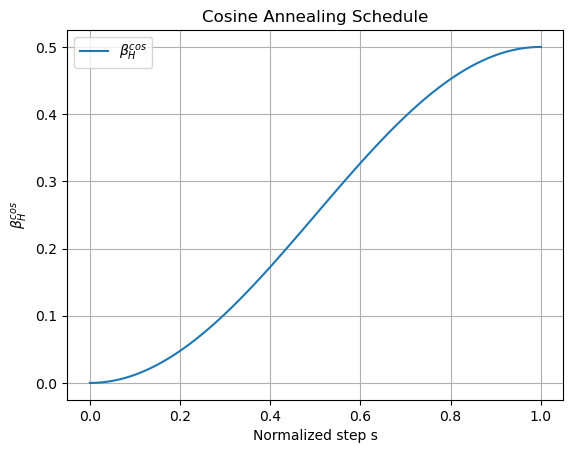

In [2]:
import numpy as np
import matplotlib.pyplot as plt

beta_end = 0.5
s = np.linspace(0, 1, 100)
beta_cos = -0.5 * beta_end * (1 + np.cos(np.pi * s)) + beta_end

plt.plot(s, beta_cos, label=r'$\beta_H^{cos}$')
plt.xlabel('Normalized step s')
plt.ylabel(r'$\beta_H^{cos}$')
plt.title('Cosine Annealing Schedule')
plt.grid(True)
plt.legend()
plt.show()
